In [1]:
import pandas as pd
import tensorflow as tf
from data_augmentation import TEST_DATA
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

2024-02-25 15:12:57.822405: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-02-25 15:12:58.064996: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-25 15:12:58.065035: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-25 15:12:58.099220: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-25 15:12:58.172166: I tensorflow/core/platform/cpu_feature_guar

In [2]:
best_model = tf.keras.models.load_model('model_checkpoints/my_model_weights_best.keras')
test_df = pd.read_csv('test_data.csv')

2024-02-25 15:16:52.462906: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-25 15:16:52.599438: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-25 15:16:52.599782: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [3]:
test_df['pred_proba'] = best_model.predict(TEST_DATA[0])

 1/10 [==>...........................] - ETA: 7s

2024-02-25 15:16:57.278146: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904


10/10 [==============================] - 1s 10ms/step


In [4]:
test_df['prediction'] = (test_df['pred_proba'] > 0.5).astype(int)
test_df['is_same'] = test_df['is_same'].astype(int)

In [5]:
test_df['prediction']

0      0
1      0
2      0
3      0
4      0
      ..
315    0
316    0
317    0
318    0
319    0
Name: prediction, Length: 320, dtype: int64

In [6]:
len(test_df[test_df['is_same'] == test_df['prediction']])/len(test_df)

0.928125

In [7]:
test_df[['adress_1', 'adress_2', 'is_same', 'prediction', 'pred_proba']]

,adress_1,adress_2,is_same,prediction,pred_proba
0,"Донецька обл., м.Макіївка, вул.Українська, 3, ...","ЧЕРКАСЬКА ОБЛ., ЧЕРКАСЬКИЙ РАЙОН, СЕЛО РУСЬКА ...",0,0,1.165092e-02
1,"Житомирська обл., Брусилівський р-н, смт Бруси...","ЖИТОМИРСЬКА ОБЛ., МІСТО ЖИТОМИР, БОГУНСЬКИЙ РА...",0,0,1.642710e-04
2,"83010, Донецька обл., м.Донецьк, вул.Крамарчук...","ЛЬВІВСЬКА ОБЛ., МІСТО ЛЬВІВ, ЗАЛІЗНИЧНИЙ РАЙОН...",0,0,6.776909e-05
3,"65016, Одеська обл., м.Одеса, вул.Костанді, 38","51254, ДНІПРОПЕТРОВСЬКА ОБЛ., НОВОМОСКОВСЬКИЙ ...",0,0,8.906026e-10
4,"44801, Волинська обл., Турійський р-н, смт Тур...","РІВНЕНСЬКА ОБЛ., РОКИТНІВСЬКИЙ РАЙОН, СЕЛИЩЕ М...",0,0,6.860867e-09
...,...,...,...,...,...
315,"київ, синя, 10","київ, червона, 5",0,0,1.151112e-15
316,"маріуполь, синя, 10","маріуполь, червона, 5",0,0,1.787003e-15
317,"львів, синя, 10","львів, червона, 5",0,0,1.254310e-15
318,"луцьк, синя, 10","луцьк, червона, 5",0,0,1.237245e-15


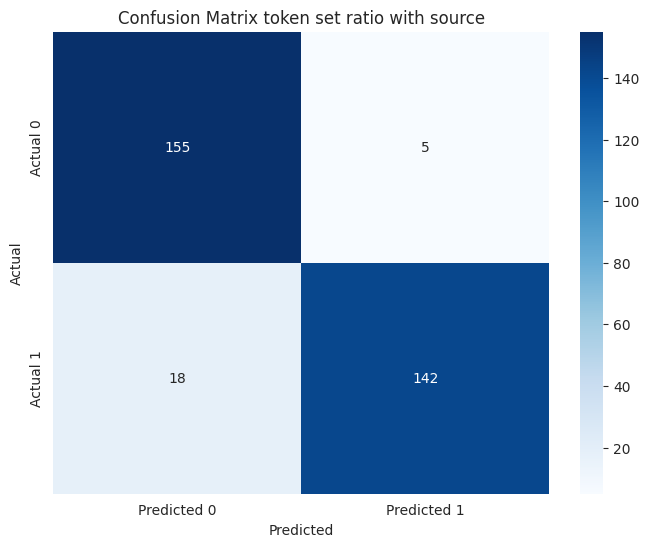

In [8]:
# Compute the confusion matrix
cm = confusion_matrix(test_df['is_same'], test_df['prediction'])
# Plotting using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix token set ratio with source')
plt.show()

In [9]:
test_df[test_df['is_same'] != test_df['prediction']]

,adress_1,adress_2,is_same,pred_proba,prediction
152,"КИЇВСЬКА обл., СЕЛО ПОГРЕБИ, вул.Кірова, буд 2...","КИЇВСЬКА ОБЛ., БРОВАРСЬКИЙ РАЙОН, СЕЛО ПОГРЕБИ...",1,2.545270e-11,0
153,"32207, Село Яблунівка, ХМЕЛЬНИЦЬКА область","32207, ХМЕЛЬНИЦЬКА ОБЛ., ДЕРАЖНЯНСЬКИЙ Р-Н, СЕ...",1,2.899076e-04,0
154,"Житомирьска обл., Богунський р-н, м.Житомир, в...","10020, ВУЛ. МАКСЮТОВА, 18, КВ.3, М.ЖИТОМИР, БО...",1,1.737012e-03,0
171,"Херсонська обл., м.Херсон, вул.Кулика, 114, кв.17","Херсонська ОБЛ., м.Херсон, ВУЛИЦЯ Кулика, БУДИ...",1,1.368825e-13,0
174,"03148, м.Київ, просп.Курбаса Леся, 9, кв.345","03148, МІСТО київ, проспект Курбаса Леся, БУДИ...",1,4.782014e-14,0
179,"Росiйська Федерацiя, Москва, вул.Новолісна, 17...","Росiйська Федерацiя, Москва, ВУЛИЦЯ Новолісна ...",1,1.623253e-15,0
193,"21021, Вінницька обл., м.Вінниця, вул.Келецька...","Вінницька ОБЛ., МІСТО Вінниця, ЗАЛІЗНИЧНИЙ РАЙ...",1,3.370158e-03,0
204,"16341, ДНІПРОПЕТРОВСЬКА обл., ДНІПРОВСЬКИЙ р-н...","ДНІПРОПЕТРОВСЬКА ОБЛ., МІСТО КАМ’ЯНСЬКЕ, ДНІПР...",1,9.081964e-03,0
209,"київська обл., м.КИЇВ, вул.ДРАГОМАНОВА, 24","М.КИЇВ, ДАРНИЦЬКИЙ РАЙОН ВУЛИЦЯ ДРАГОМАНОВА БУ...",1,2.393725e-03,0
228,"ДНІПРОПЕТРОВСЬКА обл., м.КАМ’ЯНСЬКЕ, просп.50 ...","ДНІПРОПЕТРОВСЬКА ОБЛ., МІСТО КАМ’ЯНСЬКЕ, ДНІПР...",1,3.272641e-01,0


#### Analysis of incorrect predictions

In [10]:
test_df[(test_df['is_same'] == 1) & (test_df['prediction'] == 0)]

,adress_1,adress_2,is_same,pred_proba,prediction
152,"КИЇВСЬКА обл., СЕЛО ПОГРЕБИ, вул.Кірова, буд 2...","КИЇВСЬКА ОБЛ., БРОВАРСЬКИЙ РАЙОН, СЕЛО ПОГРЕБИ...",1,2.545270e-11,0
153,"32207, Село Яблунівка, ХМЕЛЬНИЦЬКА область","32207, ХМЕЛЬНИЦЬКА ОБЛ., ДЕРАЖНЯНСЬКИЙ Р-Н, СЕ...",1,2.899076e-04,0
154,"Житомирьска обл., Богунський р-н, м.Житомир, в...","10020, ВУЛ. МАКСЮТОВА, 18, КВ.3, М.ЖИТОМИР, БО...",1,1.737012e-03,0
171,"Херсонська обл., м.Херсон, вул.Кулика, 114, кв.17","Херсонська ОБЛ., м.Херсон, ВУЛИЦЯ Кулика, БУДИ...",1,1.368825e-13,0
174,"03148, м.Київ, просп.Курбаса Леся, 9, кв.345","03148, МІСТО київ, проспект Курбаса Леся, БУДИ...",1,4.782014e-14,0
179,"Росiйська Федерацiя, Москва, вул.Новолісна, 17...","Росiйська Федерацiя, Москва, ВУЛИЦЯ Новолісна ...",1,1.623253e-15,0
193,"21021, Вінницька обл., м.Вінниця, вул.Келецька...","Вінницька ОБЛ., МІСТО Вінниця, ЗАЛІЗНИЧНИЙ РАЙ...",1,3.370158e-03,0
204,"16341, ДНІПРОПЕТРОВСЬКА обл., ДНІПРОВСЬКИЙ р-н...","ДНІПРОПЕТРОВСЬКА ОБЛ., МІСТО КАМ’ЯНСЬКЕ, ДНІПР...",1,9.081964e-03,0
209,"київська обл., м.КИЇВ, вул.ДРАГОМАНОВА, 24","М.КИЇВ, ДАРНИЦЬКИЙ РАЙОН ВУЛИЦЯ ДРАГОМАНОВА БУ...",1,2.393725e-03,0
228,"ДНІПРОПЕТРОВСЬКА обл., м.КАМ’ЯНСЬКЕ, просп.50 ...","ДНІПРОПЕТРОВСЬКА ОБЛ., МІСТО КАМ’ЯНСЬКЕ, ДНІПР...",1,3.272641e-01,0


In [11]:
test_df[(test_df['is_same'] == 0) & (test_df['prediction'] == 1)]

,adress_1,adress_2,is_same,pred_proba,prediction
310,маріуполь,київ,0,0.950320,1
311,київ,маріуполь,0,0.897248,1
312,луцьк,львів,0,0.892266,1
313,львів,луцьк,0,0.962222,1
314,донецьк,дніпро,0,0.932986,1


## Issues in Address Classification

### 1) Wrong Label

**Example:**
`Херсонська обл., м.Херсон, вул.Кулика, 114, кв.17`
*Incorrectly Matched To:*
`Херсонська ОБЛ., м.Херсон, ВУЛИЦЯ Кулика, БУДИНОК 114`
**Issue:** Apartment number is not specified.

**TODO:** Ensure apartment numbers are captured correctly.

### 2) Wrong Classification (False Negative)

**Example:**
`10020, ЖИТОМИРСЬКА обл., БОГУНСЬКИЙ р-н, м.ЖИТОМИР, вул.МАКСЮТОВА, 18, 3`
*Incorrectly Matched To:*
`10020, ВУЛ. МАКСЮТОВА, 18, КВ.3, М.ЖИТОМИР, БОГУНСЬКИЙ РАЙОН, ЖИТОМИРСЬКА ОБЛАСТЬ`
**TODO:** Expand the source of training templates based on wrong classification examples.

### 3) Wrong Classification (False Positive)

**Example:**
`львів`
*Incorrectly Matched To:*
`луцьк`
**TODO:** Add training examples for short addresses like only city or street.
